In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline


In [127]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [128]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [129]:
mapping = {'Y':1,'N':0}
train['Loan_Status'] = train['Loan_Status'].map(mapping).astype(int)
mapping = {'Yes':1,'No':0}
train['Married'] = train['Married'].map(mapping)
test['Married'] = test['Married'].map(mapping)
mapping = {'Graduate':1,'Not Graduate':0}
train['Education'] = train['Education'].map(mapping)
test['Education'] = test['Education'].map(mapping)
mapping = {'Male':0,'Female':1}
train['Gender'] = train['Gender'].map(mapping)
test['Gender'] = test['Gender'].map(mapping)

In [130]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [131]:
train.describe(percentiles=[0.1,.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,.95])

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,601.000000,611.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,0.186356,0.651391,0.781759,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,0.389718,0.476920,0.413389,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,2216.100000,0.000000,71.000000,294.00000,0.000000,0.000000
15%,0.000000,0.000000,0.000000,2478.700000,0.000000,84.650000,360.00000,0.000000,0.000000
20%,0.000000,0.000000,0.000000,2605.400000,0.000000,95.000000,360.00000,1.000000,0.000000
30%,0.000000,0.000000,1.000000,3050.400000,0.000000,108.000000,360.00000,1.000000,0.000000
40%,0.000000,1.000000,1.000000,3406.800000,0.000000,116.000000,360.00000,1.000000,1.000000
50%,0.000000,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000


- 84% have a credit history
- around 10% have Loan amount term less than a year.
- everything else follow same pattern as it should.

In [132]:
train.describe(include=['O'])

,Loan_ID,Dependents,Self_Employed,Property_Area
count,614,599,582,614
unique,614,4,2,3
top,LP001888,0,No,Semiurban
freq,1,345,500,233


In [133]:
print train['Dependents'].value_counts()
print train['Education'].value_counts()
print train['Property_Area'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
1    480
0    134
Name: Education, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [160]:
def pivot(df,x,y):
    """prints a correlation table between two columns x and y of dataframe df"""
    return df[[x,y]].groupby([x],as_index=False).mean().sort_values(by=y,ascending=False)

In [135]:
pivot(train,'Dependents','Loan_Status')

  Dependents  Loan_Status
2          2     0.752475
0          0     0.689855
1          1     0.647059
3         3+     0.647059


In [136]:
pivot(train,'Education','Loan_Status')

   Education  Loan_Status
1          1     0.708333
0          0     0.611940


In [137]:
pivot(train,'Credit_History','Loan_Status')

   Credit_History  Loan_Status
1             1.0     0.795789
0             0.0     0.078652


In [138]:
pivot(train,'Property_Area','Loan_Status')

  Property_Area  Loan_Status
1     Semiurban     0.768240
2         Urban     0.658416
0         Rural     0.614525


In [139]:
pivot(train,'Married','Loan_Status')

   Married  Loan_Status
1      1.0     0.716080
0      0.0     0.629108


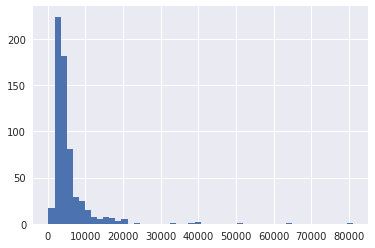

In [140]:
train['ApplicantIncome'].hist(bins=50)

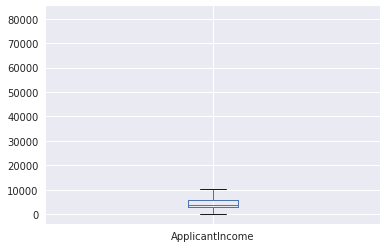

In [141]:
train.boxplot(column='ApplicantIncome')

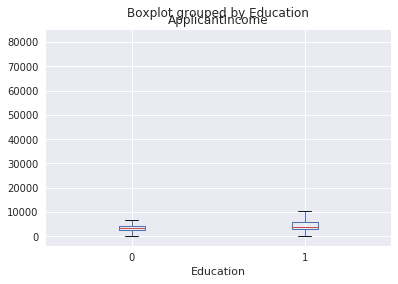

In [142]:
train.boxplot(column='ApplicantIncome',by='Education')

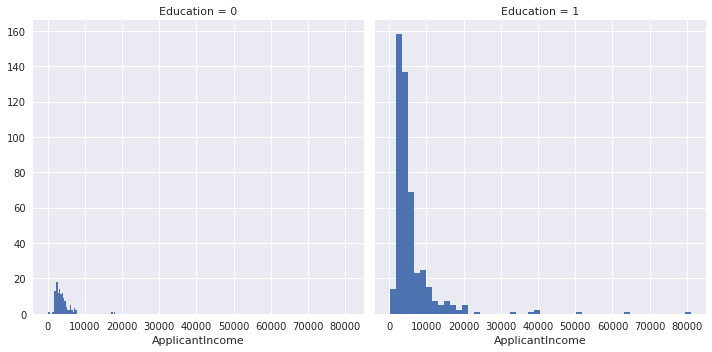

In [143]:
g = sns.FacetGrid(train,col='Education',size=5)
g.map(plt.hist,'ApplicantIncome',bins=50)

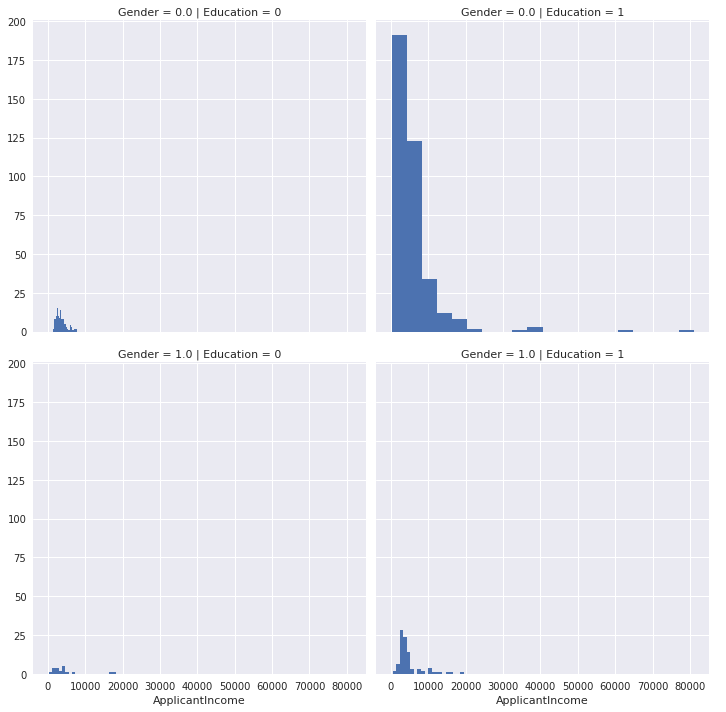

In [144]:
g = sns.FacetGrid(train,col='Education',row='Gender',size=5)
g.map(plt.hist,'ApplicantIncome',bins=20)
g.add_legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa63370f410>]], dtype=object)

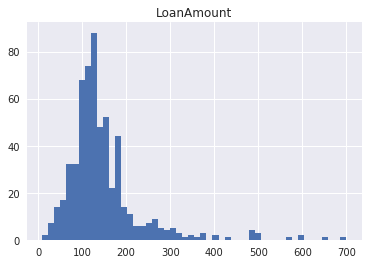

In [145]:
train.hist(column='LoanAmount',bins=50)

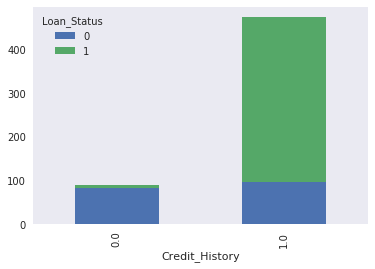

In [146]:
tmp = pd.crosstab(train['Credit_History'],train['Loan_Status'])
tmp.plot(kind='bar',stacked=True,grid=False)

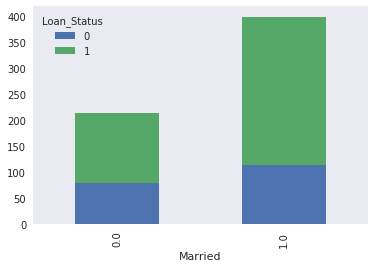

In [147]:
tmp = pd.crosstab(train['Married'],train['Loan_Status'])
tmp.plot(kind='bar',stacked=True,grid=False)

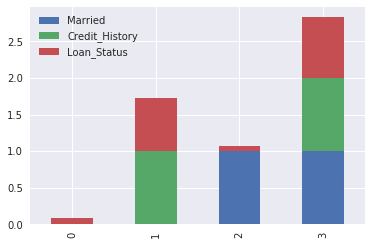

In [148]:
tmp = train[['Married','Credit_History','Loan_Status']].groupby(['Married','Credit_History'],as_index=False).\
                        mean()
tmp.plot(kind='bar',stacked=True)

In [149]:
#Missing Values
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [150]:
train['Self_Employed'].fillna(train.Self_Employed.mode()[0],inplace=True)

In [151]:
table = train.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)

In [152]:
def fill_LoanAmt(x):
    return table.loc[x['Self_Employed'],x['Education']]

In [153]:
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fill_LoanAmt, axis=1), inplace=True)

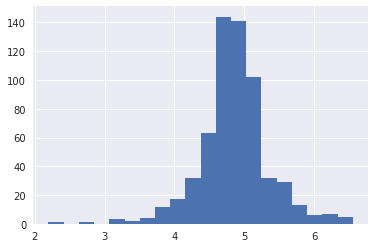

In [154]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

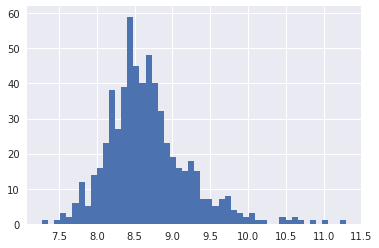

In [158]:
train['TotalIncome'] = train['ApplicantIncome']+train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins=50)

In [168]:
train['Credit_History'].fillna(train[train['Credit_History'].isnull()].apply(lambda x: 1 if x.Loan_Status==1 else 0,axis=1),inplace=True)

In [180]:
train['Married'] = train['Married'].fillna('1.0').astype(float)

In [181]:
train.pivot_table(values='Loan_Status',index='Married',columns='Dependents',aggfunc=np.sum)

Dependents,0,1,2,3+
Married,,,,
0.0,110,13,5,4
1.0,128,53,71,29


In [182]:
train['Dependents'].fillna('0',inplace=True)

In [193]:
# train.pivot_table(values='Loan_Status',index='Married',columns='Self_Employed',aggfunc=np.sum)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [194]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [201]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [208]:
train.drop(['Per_Month_Amnt'],inplace=True,axis=1)

In [213]:
R = 9.5
"""EMI = [P x R x (1+R)^N]/[(1+R)^N-1]"""
train['EMI_Per_Month'] = (train['LoanAmount']*R*((R+1)**train['Loan_Amount_Term']))/((R+1)**(train['Loan_Amount_Term']-1))

In [214]:
train['EMI_Per_Income'] = train['EMI_Per_Month']/(train['TotalIncome']/12)

In [226]:
#Semiurban
#Urban
#Rural
mapping = {'Semiurban':0,'Urban':1,'Rural':2}
train['Property_Area'] = train['Property_Area'].map(mapping).astype(int)

In [229]:
train['Self_Employed'] = train['Self_Employed'].map({'Yes':1,'No':0}).astype(int)

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cross_validation import KFold

In [220]:
def classification_model(model, data, predictors, outcome):

    #Fit the model:
    model.fit(data[predictors],data[outcome])

    #Make predictions on training set:
    predictions = model.predict(data[predictors])

    #Print accuracy
    accuracy = accuracy_score(predictions,data[outcome])
    print "Accuracy : %s" % "{0:.3%}".format(accuracy)

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [222]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 83.062%
Cross-Validation Score : 83.065%


In [230]:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 83.062%
Cross-Validation Score : 83.065%


In [232]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 83.062%
Cross-Validation Score : 83.065%


In [236]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 89.902%
Cross-Validation Score : 70.677%
